#### 4 Redes neuronales convolucionales

In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.3.1'

In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 13134677812398129493
]


In [3]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                10250     
Total params: 62,346
Trainable params: 62,346
Non-trainable params: 0
__________________________________________________

In [4]:
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print (train_images.shape)
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

(60000, 28, 28)


In [5]:
batch_size = 50
epochs = 3

model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

history=model.fit(train_images, train_labels,
          batch_size=batch_size,
          epochs=epochs,validation_data=(test_images, test_labels),
          verbose=1
          )

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 93s 2ms/step - loss: 0.6408 - accuracy: 0.8297 - val_loss: 0.1938 - val_accuracy: 0.9435
Epoch 2/3
60000/60000 [==============================] - 86s 1ms/step - loss: 0.1713 - accuracy: 0.9501 - val_loss: 0.1265 - val_accuracy: 0.9633
Epoch 3/3
60000/60000 [==============================] - 93s 2ms/step - loss: 0.1220 - accuracy: 0.9645 - val_loss: 0.0927 - val_accuracy: 0.9743


Evaluación modelo

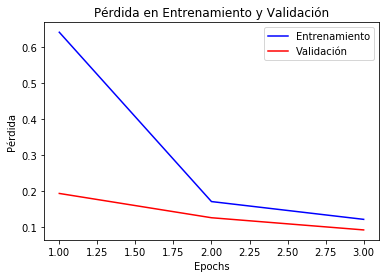

In [7]:
import matplotlib.pyplot as plt

ent_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(ent_loss) + 1)

plt.plot(epochs, ent_loss, 'b', label='Entrenamiento')
plt.plot(epochs, val_loss, 'r', label='Validación')
plt.title('Pérdida en Entrenamiento y Validación')
plt.xlabel('Epochs')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

capa 0


C:\Users\paco\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


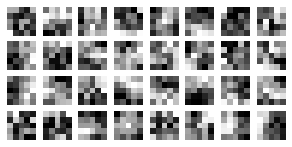

In [11]:
def view_kernel(layer=0,num_kernels=16,cmap='gray'):
    conv1_kernels = model.layers[layer].get_weights()[0] # 0 para obtener weights, 1 para obtener bias
    plt.rcParams["figure.figsize"] = (5, 5)

    for i in range(num_kernels):
      plt.subplot(8, 8, i + 1)
      plt.imshow(conv1_kernels[:, :, 0, i], cmap)
      plt.axis('off')
#view_kernel(0,32)
print("capa 0")
view_kernel(0,16)
view_kernel(0,32)